In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

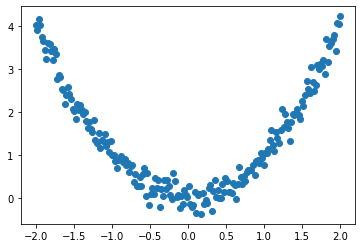

In [3]:
x_data = np.linspace(-2,2,200)[:,np.newaxis]
noise = np.random.normal(0,0.2,x_data.shape)
y_data = np.square(x_data)+noise

plt.scatter(x_data,y_data)
plt.show()

In [4]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

In [5]:
# 把numpy数据变成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data)

In [8]:
# 构建神经网络模型
# 一般把网络中具有可学习参数的层放在__init__()中
class LinearRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        # 初始化nn.Module
        super(LinearRegression, self).__init__()
        #1-10-1的神经元结构
        self.fc1 = nn.Linear(1,10)
        self.tanh = nn.Tanh()#激活函数
        self.fc2 = nn.Linear(10,1)
    # 定义网络计算
    def forward(self,x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        return x

In [9]:
# 定义模型
model = LinearRegression() 
# 定义代价函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.3)

In [10]:
for name, parameters in model.named_parameters():
    print('name:{}, param:{}'.format(name,parameters))

name:fc1.weight, param:Parameter containing:
tensor([[-0.4438],
        [ 0.0717],
        [-0.4306],
        [-0.2407],
        [ 0.9915],
        [ 0.7502],
        [-0.5616],
        [-0.8572],
        [ 0.7425],
        [-0.8901]], requires_grad=True)
name:fc1.bias, param:Parameter containing:
tensor([-0.0826, -0.8461,  0.0085,  0.4415, -0.2386,  0.8945,  0.4052, -0.6417,
         0.2888,  0.2585], requires_grad=True)
name:fc2.weight, param:Parameter containing:
tensor([[ 0.1501, -0.1338,  0.1587,  0.1326, -0.0451,  0.0125,  0.1862, -0.0895,
         -0.0155,  0.3003]], requires_grad=True)
name:fc2.bias, param:Parameter containing:
tensor([-0.0071], requires_grad=True)


In [11]:
for i in range(2001):
    out = model(inputs)
    # 计算loss
    loss = mse_loss(out, target)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200 == 0:
        print(i,loss.item())

0 3.054873466491699
200 0.17071594297885895
400 0.13969652354717255
600 0.111454077064991
800 0.09086797386407852
1000 0.08336448669433594
1200 0.08041173219680786
1400 0.07881198078393936
1600 0.07749078422784805
1800 0.07626011222600937
2000 0.07509281486272812


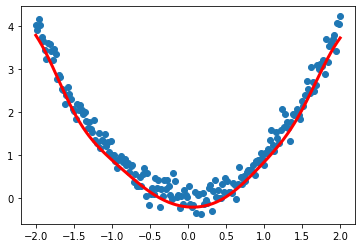

In [12]:
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()